#### Importing libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')


#### Import Dataset

In [36]:
sales_data=pd.read_csv("C:/Users/HP/Downloads/Sales_Data.csv")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Initial Inspection of Datset

##### Shape of dataset

In [39]:
sales_data.shape

(186850, 6)

##### Checking datatypes

In [41]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### DATA CLEANING

##### Checking Null values

In [44]:
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Similar number of values across all columns indicates that these are the number of rows with all values as null

<Axes: >

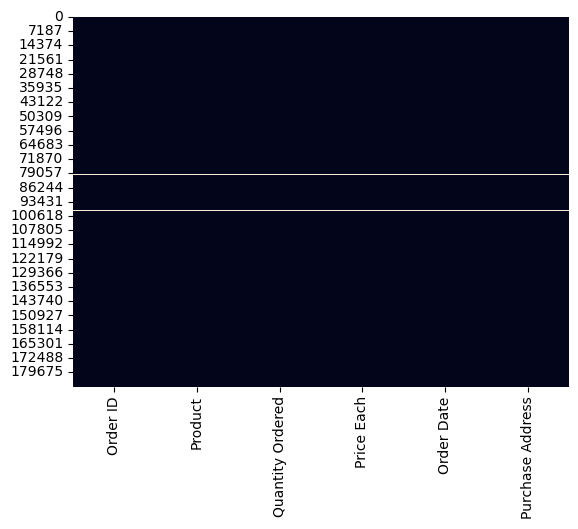

In [46]:
sns.heatmap(sales_data.isnull(), cbar=False)

#### Dropping All Null Values Rows

In [48]:
sales_data.dropna(how='all', inplace=True) 

In [49]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

All Null Values Removed!

#### Checking Duplicates

In [52]:
#sales_data[sales_data.duplicated()]  #Row level duplicates
sales_data.duplicated().sum()

618

There are 618 duplicated rows that needs to be removed

##### Dropping Duplicated Rows

In [55]:
sales_data = sales_data.drop_duplicates()

In [56]:
sales_data.duplicated().sum()

0

##### All duplicated rows are removed, keeping only the first occurances

##### Checking any invalid inputs in data (value entered with name of column)

In [59]:
invalid_rows=sales_data[sales_data['Order Date']=='Order Date']
invalid_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Drop row with invalid input

In [61]:
sales_data.drop(519, axis = 0, inplace = True)


#### Updating datatypes of columns for feature engineering for further analysis

Order Date column from object to datetimem

In [64]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%m/%d/%y %H:%M')

Quantity Ordered and Price Each column from object to numeric

In [66]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])

sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

In [67]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


# Feature Engineering

Transform new columns useful for analysis 

### Sales Column (Price * Qty Orderd)

In [70]:
sales_data['Sales'] = sales_data["Quantity Ordered"] * sales_data["Price Each"]


In [71]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


### Extract Month, Day, Hour, Minute columns from order date

In [73]:
from datetime import date
from datetime import datetime

In [74]:
# Abbreviated month names (Jan, Feb, etc.)
sales_data['Month'] = sales_data['Order Date'].dt.strftime('%b')

# Abbreviated day names (Mon, Tue, etc.)
sales_data['Day'] = sales_data['Order Date'].dt.strftime('%a')

# Hour 
sales_data['Hour'] = sales_data['Order Date'].dt.hour

#Minute
sales_data['Minute'] = sales_data['Order Date'].dt.minute


In [75]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Day,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Apr,Fri,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Apr,Sun,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Apr,Fri,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Apr,Fri,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Apr,Tue,9,27


### Extracting City and State from Purchase Address Column


In [77]:
sales_data['City'] = sales_data['Purchase Address'].str.split(',').str[1].str.strip()

In [78]:
sales_data['State'] = sales_data['Purchase Address'].str.split(',').str[2].str.strip().str.split(' ').str[0]

In [79]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Day,Hour,Minute,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Apr,Fri,8,46,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Apr,Sun,22,30,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Apr,Fri,14,38,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Apr,Fri,14,38,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Apr,Tue,9,27,Los Angeles,CA


## DATA EXPLORATION

### Univariate Analysis

#### Analyzing Distribution of Quantity Ordered

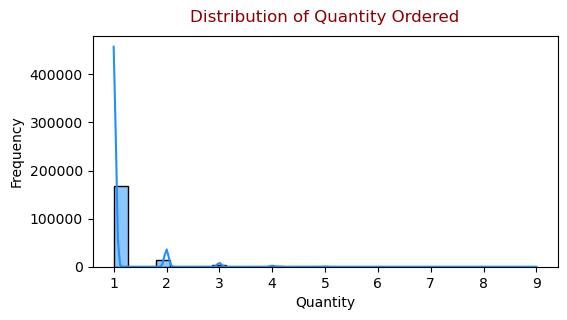

In [141]:
plt.figure(figsize=(6, 3))
sns.histplot(sales_data['Quantity Ordered'], kde=True, bins=30, color='dodgerblue')

# Title and other settings
plt.title('Distribution of Quantity Ordered', fontsize=12, color='darkred', pad=10)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


In [84]:
Qty_counts= sales_data['Quantity Ordered'].value_counts().reset_index()
Qty_counts.columns = ['Quantity Ordered', 'Count']
Qty_1_counts = Qty_counts[Qty_counts['Quantity Ordered'] ==1]


In [85]:
percentage_1_Qty = (Qty_1_counts['Count'].sum() / Qty_counts['Count'].sum()) * 100
print(f"Percentage of orders with Qty 1: {percentage_1_Qty:.2f}%")

Percentage of orders with Qty 1: 90.63%


### Observation
90% of orders consist of only 1 item, showing that bulk or multi item purchases are rare.

### Strategic Recommendation

Increase sales quantity per order by introducing:

-- Quantity discounts.

- Free shipping thresholds (e.g., free shipping on orders over a certain value).

-- Bundle deals to incentivize purchasing multiple items together.



### Analyzing Price Distribution

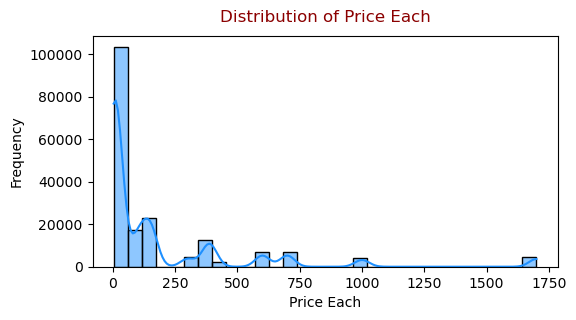

In [139]:
plt.figure(figsize=(6, 3))
sns.histplot(sales_data['Price Each'], kde=True, bins=30, color='dodgerblue')

# Title and other settings
plt.title('Distribution of Price Each', fontsize=12, color='darkred', pad=10)
plt.xlabel('Price Each')
plt.ylabel('Frequency')
plt.show()


In [90]:
# Define bins and labels
bins = [0, 250, 500, 1000, float('inf')]
labels = ['<=250', '251–500', '501–1000', '>1000']

# Cut the data and get counts
price_counts = pd.cut(sales_data['Price Each'], bins=bins, labels=labels)

# Count and calculate percentage
summary_p = price_counts.value_counts().sort_index().reset_index()
summary_p.columns = ['Price Range', 'Count']
summary_p['Percentage'] = (summary_p['Count'] / summary_p['Count'].sum()) * 100

summary_p_df=pd.DataFrame(summary_p)

# Display the summary
display(summary_p_df[['Price Range','Percentage']])


,Price Range,Percentage
0,<=250,77.500188
1,251–500,10.371272
2,501–1000,9.586075
3,>1000,2.542464


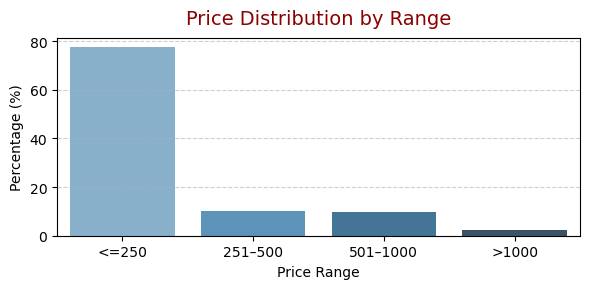

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.barplot(data=summary_p_df, x='Price Range', y='Percentage', palette='Blues_d')
plt.title('Price Distribution by Range', fontsize=14, color='darkred', pad=10)
plt.ylabel('Percentage (%)')
plt.xlabel('Price Range')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Cumulative Frequency Distribution of Prices

In [93]:
# Recalculate price counts fresh to avoid previous conflicts
price_counts_summary = sales_data['Price Each'].value_counts().reset_index()
price_counts_summary.columns = ['Price Each', 'Count']

# Total count for percentage calculation
total_count = price_counts_summary['Count'].sum()

# Define thresholds
thresholds = [250, 500, 1000]
price_range_summary = []

# Loop through thresholds
for threshold in thresholds:
    count = price_counts_summary[price_counts_summary['Price Each'] <= threshold]['Count'].sum()
    percentage = (count / total_count) * 100
    price_range_summary.append({'Price Range': f'<= {threshold}', 'Count': count, 'Percentage': f'{percentage:.2f}%'})

# Handle the above 1000 range
above_1000_count = price_counts_summary[price_counts_summary['Price Each'] > 1000]['Count'].sum()
above_1000_percentage = (above_1000_count / total_count) * 100
price_range_summary.append({'Price Range': '> 1000', 'Count': above_1000_count, 'Percentage': f'{above_1000_percentage:.2f}%'})

# Convert to DataFrame
summary_df = pd.DataFrame(price_range_summary)

# Display the final summary
display(summary_df[['Price Range','Percentage' ]])


,Price Range,Percentage
0,<= 250,77.50%
1,<= 500,87.87%
2,<= 1000,97.46%
3,> 1000,2.54%


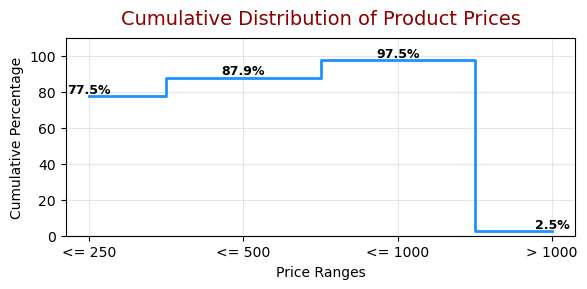

In [135]:
# 'Percentage' column is in string format like '80.5%', so first converting it to float
summary_df['Percentage'] = summary_df['Percentage'].replace('%','', regex=True).astype(float)

# Plot
plt.figure(figsize=(6, 3))
plt.step(summary_df['Price Range'], summary_df['Percentage'], where='mid', color='dodgerblue', linewidth=2)

# Add data labels
for i, perc in enumerate(summary_df['Percentage']):
    plt.text(i, perc + 2, f'{perc:.1f}%', ha='center', fontsize=9, fontweight='bold')

plt.title('Cumulative Distribution of Product Prices', fontsize=14, color='darkred', pad=10)
plt.xlabel('Price Ranges', fontsize=10)
plt.ylabel('Cumulative Percentage', fontsize=10)
plt.ylim(0, 110)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Observation
87.9% of products are priced under 500, indicating that only a small portion of the data represents high-value product orders (above $500).

### Strategic Recommendation
Increase high-value product orders to boost overall revenue by:

-- Promoting premium products more aggressively.

-- Offering financing options or installment plans.

-- Running targeted campaigns highlighting benefits and features of high-value items.

### Top Products based on Revenue

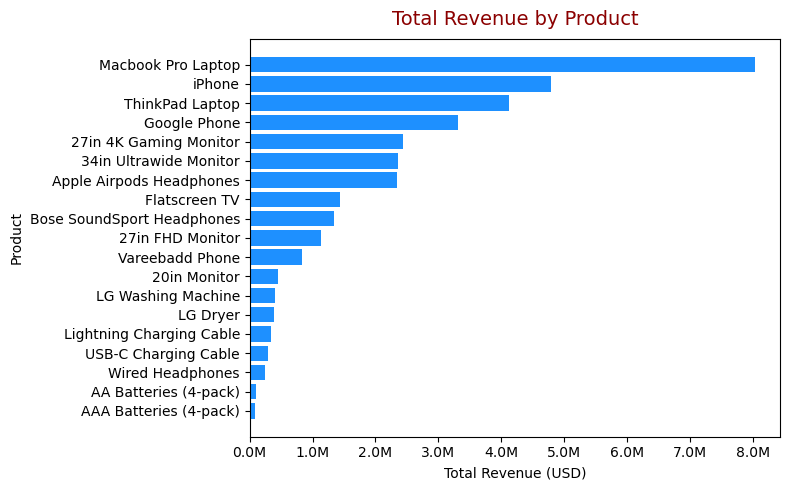

In [202]:
product_revenue=sales_data.groupby("Product").agg({'Sales':'sum'})
product_revenue=product_revenue.sort_values(by='Sales', ascending=False)

# Plot Total Sales per Product as a horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(product_revenue.index, product_revenue['Sales'], color='dodgerblue')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product')
plt.title('Total Revenue by Product', fontsize=14, color='darkred', pad=10)
plt.gca().invert_yaxis()  

# Format y-axis in millions 
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### Top Products By Quantity Sold

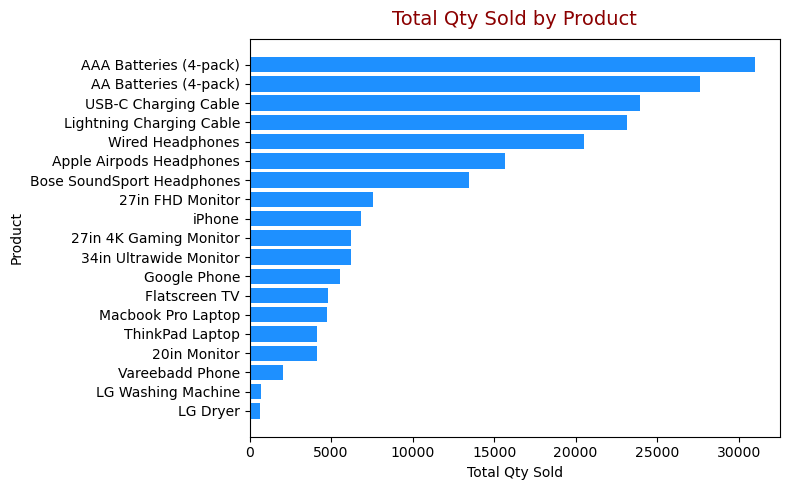

In [205]:
product_qty_sold=sales_data.groupby("Product").agg({'Quantity Ordered':'sum'})
product_qty_sold=product_qty_sold.sort_values(by='Quantity Ordered', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(product_qty_sold.index, product_qty_sold['Quantity Ordered'], color='dodgerblue')
plt.xlabel('Total Qty Sold')
plt.ylabel('Product')
plt.title('Total Qty Sold by Product', fontsize=14, color='darkred', pad=10)
plt.gca().invert_yaxis()  


plt.tight_layout()
plt.show()

### Correlation Between Price & Quantity Ordered

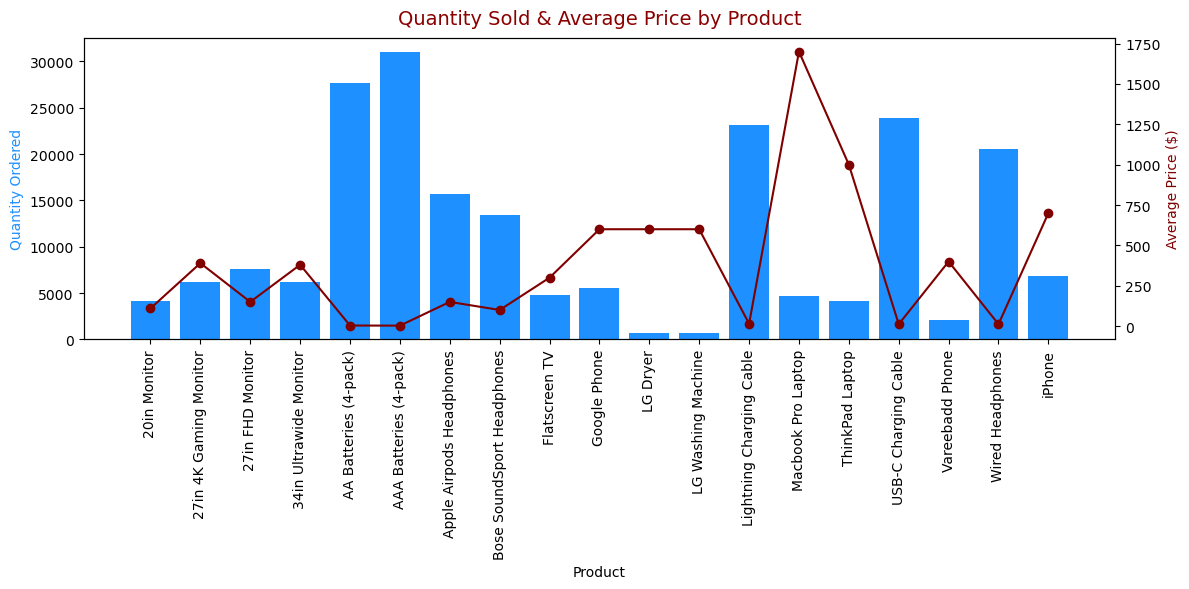

In [131]:
product_group=sales_data.groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'mean'})


fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Bar and line chart
ax1.bar(product_group.index, product_group['Quantity Ordered'], color='dodgerblue')
ax2.plot(product_group.index, product_group['Price Each'], color='maroon', marker='o')

# Labels and title
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='dodgerblue')
ax2.set_ylabel('Average Price ($)', color='maroon')
ax1.set_xticklabels(product_group.index, rotation=90, fontsize=10)
plt.title('Quantity Sold & Average Price by Product', fontsize=14, color='darkred', pad=10 )

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()



### Key Observations

There is a negative correlation between product price and quantity sold.

Low-priced products (e.g., Batteries - 4 pack) have high sales volume.

High-priced products (e.g., Laptops, Phones) have very low sales volume.

### Strategic Recommendations

**Boost High-Priced Product Sales:**

Introduce competitive price discounts to make high-end products more attractive.

-- Launch promotional strategies such as:

-- Bundle offers

-- Quantity discounts

-- Seasonal or limited-time deals

**Re-evaluate Product Strategy:**

-- Conduct consumer feedback surveys to understand barriers to purchasing high priced products.

-- Conduct competitive analysis, Improve product quality if needed and refine marketing strategies to better communicate value.

-- Consider pricing adjustments for underperforming high-ticket items.

### Revenue Distribution by City

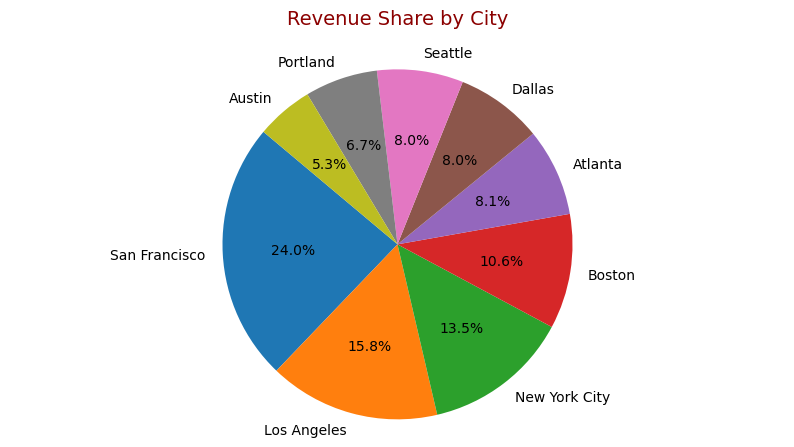

In [215]:
# Group sales data by City
city_sales = sales_data.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 5))
plt.pie(city_sales, labels=city_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share by City', fontsize=14, loc='center', color='darkred', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


### Product Wise Revenue Breakup By City

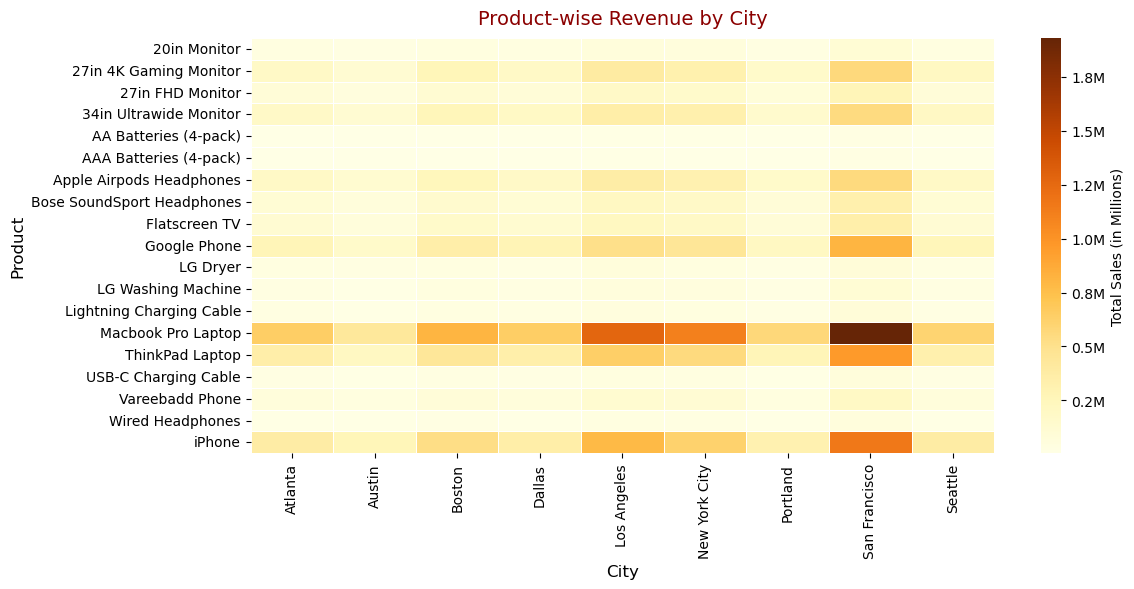

In [218]:
# Create pivot table: Product vs City
product_city_pivot = sales_data.pivot_table(index='Product', columns='City', values='Sales', aggfunc='sum')


# Create heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(product_city_pivot, annot=False, fmt='', cmap='YlOrBr', linewidths=0.5, cbar_kws={'label': 'Total Sales (in Millions)'}, annot_kws={"fontsize": 9}
)

# Format colorbar in millions
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))

# Titles and labels
plt.title('Product-wise Revenue by City', fontsize=14, color='darkred', pad=10)
plt.xlabel('City', fontsize=12)
plt.ylabel('Product', fontsize=12)

plt.tight_layout()
plt.show()


### Observation

San Francisco leads in overall sales revenue, primarily due to the high concentration of high-priced products (Laptops and Phones). Los Angeles and New York follow, also showing strong demand for premium products.

However, high-volume (low priced) products are are underperforming in these high-revenue cities, indicating a gap in electronic accessories market penetration.

### Recommendations

**Expand High-Priced Product Sales Nationwide:**

Broaden the reach of Laptops & Phones beyond the top three cities.

**Capture Accessories Market in Top Revenue Cities:**

Focus on increasing sales of low priced products (e.g., electronic accessories) in cities with high buying power like San Francisco, Los Angeles, and New York to maximize overall market share.

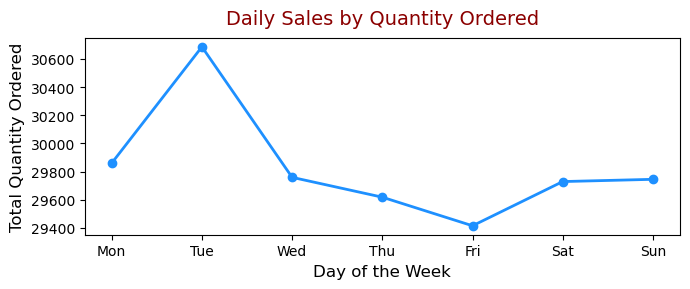

In [125]:


# Group data by Day and sum the Quantity Ordered
daily_sales = sales_data.groupby('Day')['Quantity Ordered'].sum().reindex(
    ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)

# Plotting
plt.figure(figsize=(7, 3))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='dodgerblue', linewidth=2)

# Title and labels
plt.title('Daily Sales by Quantity Ordered', fontsize=14, color='darkred', pad=10)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Quantity Ordered', fontsize=12)

# Clean aesthetics
plt.grid(False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Observations

Higher order volumes are recorded during the first three days of the week.

Friday consistently shows the lowest order volume, possibly due to reduced salesforce activity or declining motivation as the weekend approaches.

### Strategic Recommendations

**Evaluate Salesforce Performance:**

Conduct a performance audit to identify productivity patterns across the week.

Launch internal surveys to uncover potential challenges, motivational issues, or workload concerns among the sales team.

**Improve Efficiency & Morale:**

Address salesforce feedback with targeted initiatives like incentives, training, or workflow adjustments to sustain high energy throughout the week.

**Understand Market Behavior:**

Perform market surveys to identify customer buying behavior by weekday and optimize marketing and selling strategies accordingly (e.g. run promotions mid-to-late week).

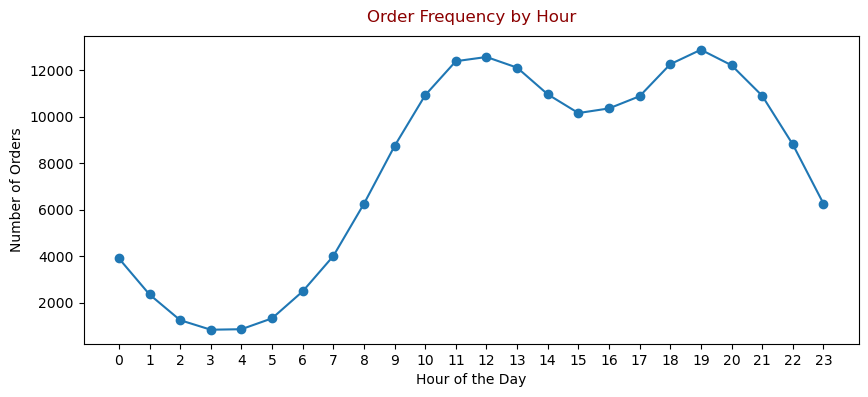

In [121]:
# Grouping by 'Hour' and counting number of orders per hour
hourly_counts = sales_data.groupby('Hour').size()

# Extract hours for x-axis
keys = hourly_counts.index

# Plotting
plt.figure(figsize=(10,4))
plt.plot(keys, hourly_counts.values,  marker='o')
plt.xticks(keys)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Order Frequency by Hour', color='darkred', pad=10)

plt.show()


### Observation
Peak order activity occurs between 11:00 AM and 9:00 PM, indicating high customer engagement during these hours.

### Strategic Recommendations

**Optimize Advertising Timing**

Schedule advertising campaigns and promotions during peak hours (11 AM – 9 PM) to capture maximum attention and drive conversions.

**Enhance Sales Engagement:**

Align salesforce availability and responsiveness with peak order hours to improve customer experience and increase order success rates.

## 📊 Key Insights

1. **Single-Item Orders Dominate**  
   Most customers (90%) place single-item orders, indicating limited cross-selling or bundling.

2. **Low Sales of High-Priced Products**  
   Nearly 88% of purchases are under $500. High-value items like laptops and phones are sold in small quantities.

3. **Price–Quantity Relationship**  
   There's a clear inverse relationship: lower-priced items (e.g., AAA batteries) sell in higher volumes.

4. **City-Wise Sales Patterns**  
   San Francisco, Los Angeles, and New York lead in overall revenue, driven by high-value purchases. Austin and similar cities contribute minimally        to high-ticket sales.
   
   low-price products underperform in high revenue cities indicating untapped market potential.

6. **Order Timing Trends**  
   - **Peak order hours:** 11 AM to 9 PM  
   - **High sales days:** Monday to Wednesday  
   - **Low sales day:** Friday

---

## ✅ Actionable Recommendations

1. **Increase Average Order Value**  
   Introduce free shipping thresholds, bundle deals, or cross-sell promotions to encourage multi-item purchases.

2. **Boost High-Ticket Product Sales**  
   Offer limited-time discounts, collect customer feedback, and optimize pricing strategies for premium items.

3. **Expand High-Value Product Reach**  
   Focus on cities like Austin, Dallas, and Portland with targeted marketing and local promotions.

4. **Match Product Mix to City Demand**  
   Promote fast-moving, low-cost products in high-revenue cities to capture missed market share.

5. **Optimize Sales Team Productivity**  
   Address potential midweek fatigue with revised KPIs or incentives. Survey the team for feedback and support needs.

6. **Target Peak Activity Hours**  
   Schedule marketing campaigns, ads, and flash sales during 11 AM – 9 PM to align with buying behavior.

7. **Conduct Regional Market Research**  
   Understand regional demand gaps through customer surveys to refine marketing and sales strategies.
